### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

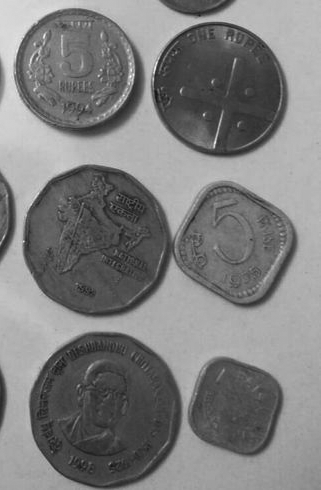

In [2]:
coins = cv2.imread('Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

In [3]:
def show_image_with_cmap(image, cmap='hot'):
    plt.imshow(image, cmap=cmap)
    plt.colorbar()  
    plt.show()

Rozwiązanie:

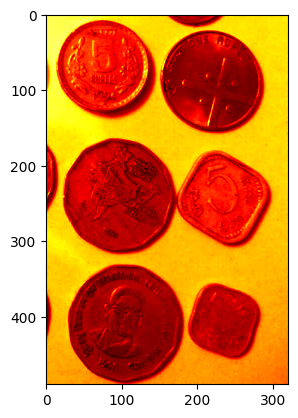

In [4]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

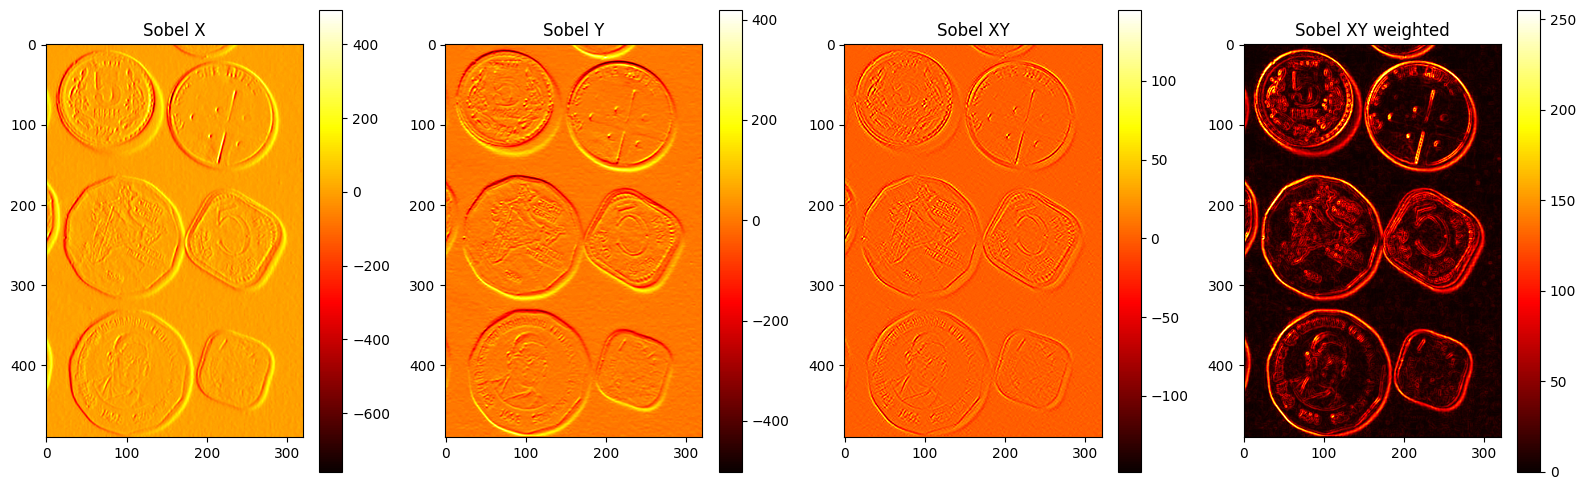

In [12]:
sobelx = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)

sobely = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

sobelxy = cv2.Sobel(coins, cv2.CV_64F, 1, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)


grad_xy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# show 4 images with colorbar side by side

f, axarr = plt.subplots(1, 4, figsize=(16, 5))

# Sobel X
im0 = axarr[0].imshow(sobelx, cmap="hot")
f.colorbar(im0, ax=axarr[0])
axarr[0].set_title("Sobel X")

# Sobel Y
im1 = axarr[1].imshow(sobely, cmap="hot")
f.colorbar(im1, ax=axarr[1])
axarr[1].set_title("Sobel Y")

# Sobel XY
im2 = axarr[2].imshow(sobelxy, cmap="hot")
f.colorbar(im2, ax=axarr[2])
axarr[2].set_title("Sobel XY")

# Sobel XY weighted
im3 = axarr[3].imshow(grad_xy, cmap="hot")
f.colorbar(im3, ax=axarr[3])
axarr[3].set_title("Sobel XY weighted")
f.tight_layout()
plt.show()

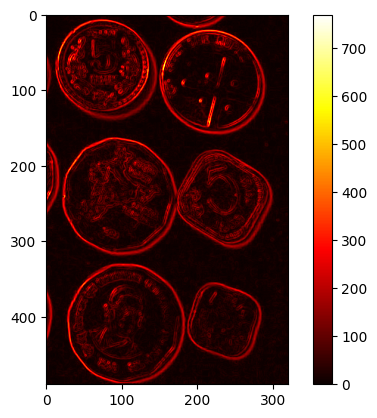

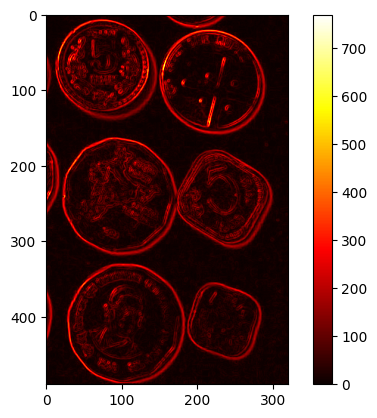

In [110]:
sobelx = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)

sobely = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

show_image_with_cmap(gradient_magnitude)

magnitude = cv2.magnitude(sobelx, sobely)
show_image_with_cmap(magnitude)


---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

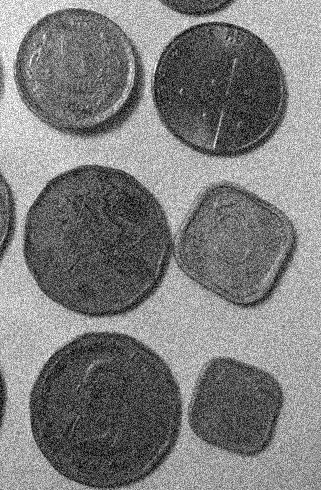

In [8]:
coins_noise = cv2.imread('Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

Badanie wartości progów ze szumem

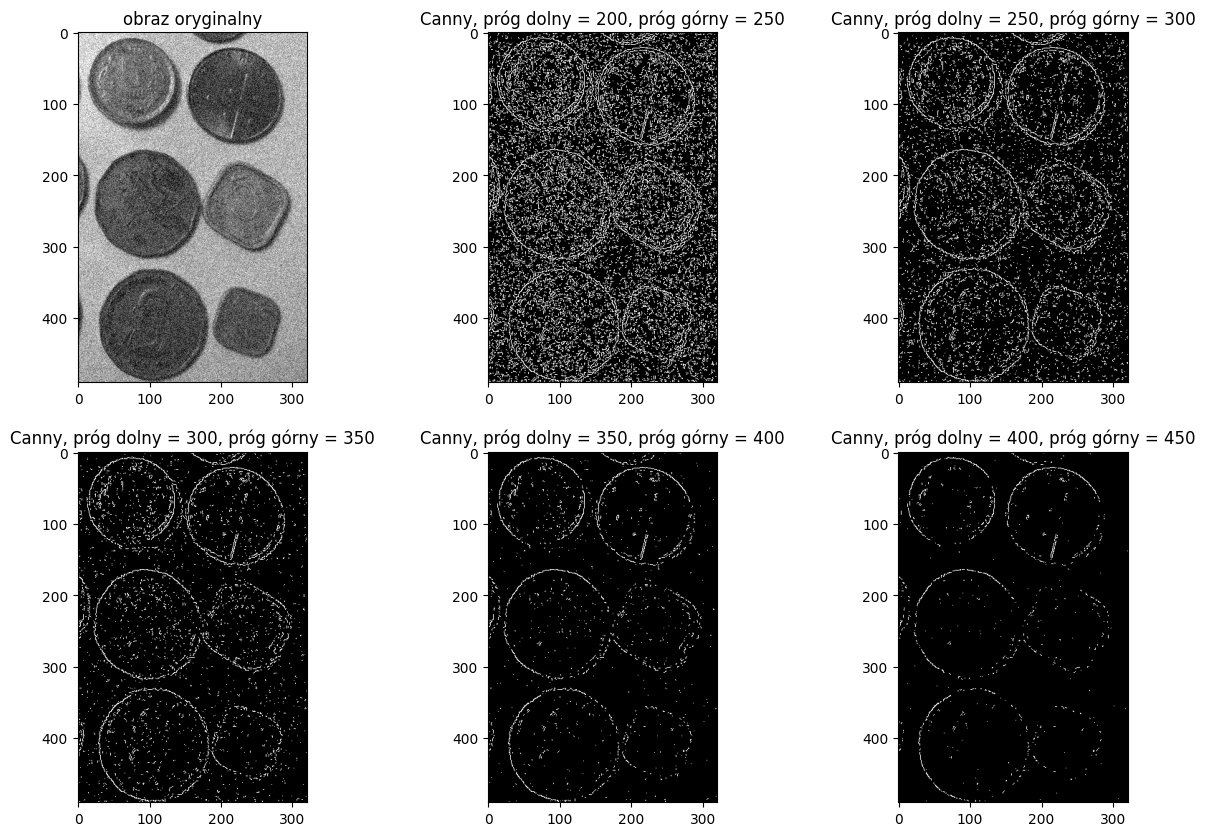

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)

# Create subplots
f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

# Display original image
a1.imshow(coins_noise, cmap='gray')
a1.set_title('obraz oryginalny')

# Apply Canny filter with different thresholds
thresholds = [(50, 100), (100, 150), (150, 200), (200, 250), (250, 300)]
axes = [a2, a3, a4, a5, a6]

for ax, (t1, t2) in zip(axes, thresholds):
    edges = cv2.Canny(image=coins_noise, threshold1=t1, threshold2=t2)
    ax.imshow(edges, cmap='gray')
    ax.set_title(f'Canny, próg dolny = {t1}, próg górny = {t2}')

plt.show()

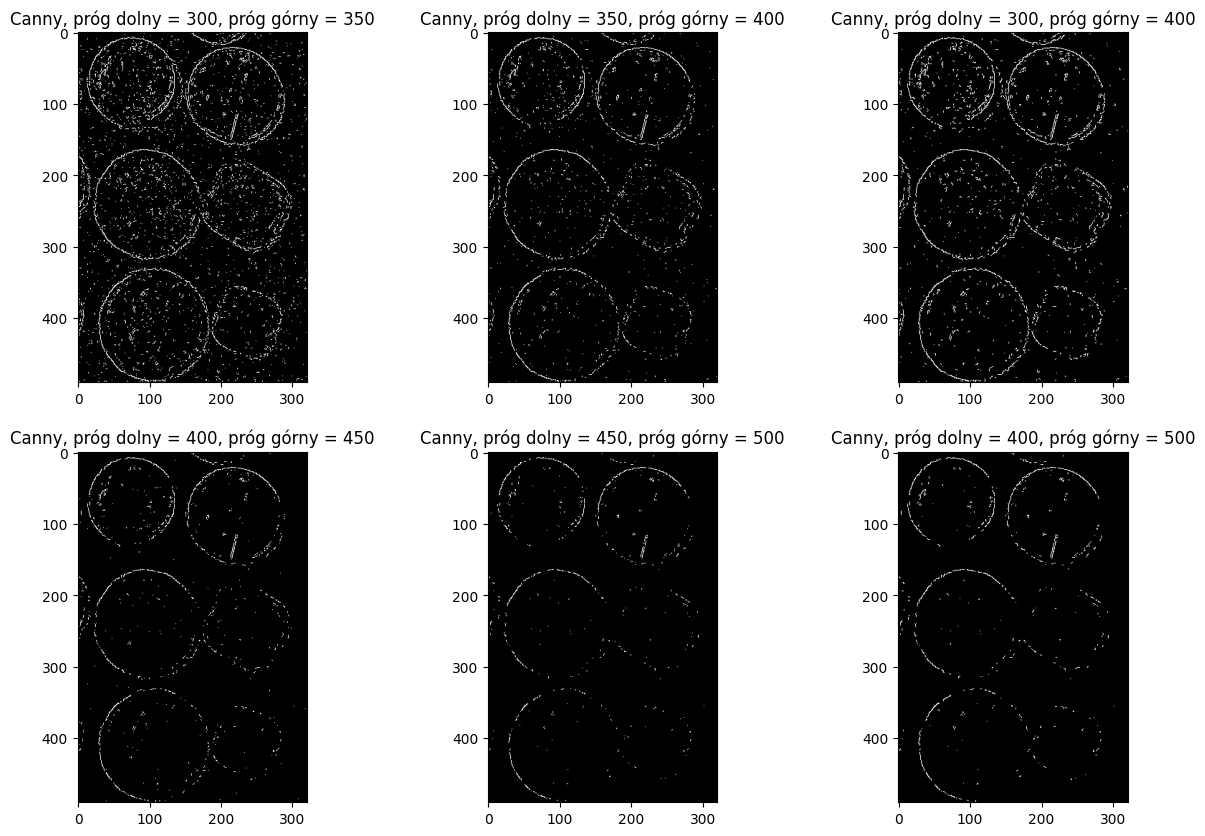

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the image
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)

# Create subplots
f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

thresholds = [
    (300, 350),
    (350, 400),
    (300, 400),
    (400, 450),
    (450, 500),
    (400, 500),
]
axes = [a1, a2, a3, a4, a5, a6]

for ax, (t1, t2) in zip(axes, thresholds):
    edges = cv2.Canny(image=coins_noise, threshold1=t1, threshold2=t2)
    ax.imshow(edges, cmap="gray")
    ax.set_title(f"Canny, próg dolny = {t1}, próg górny = {t2}")

plt.show()

Badanie ustalonej wartośc progu dla różnych sposobów redukcji szumu

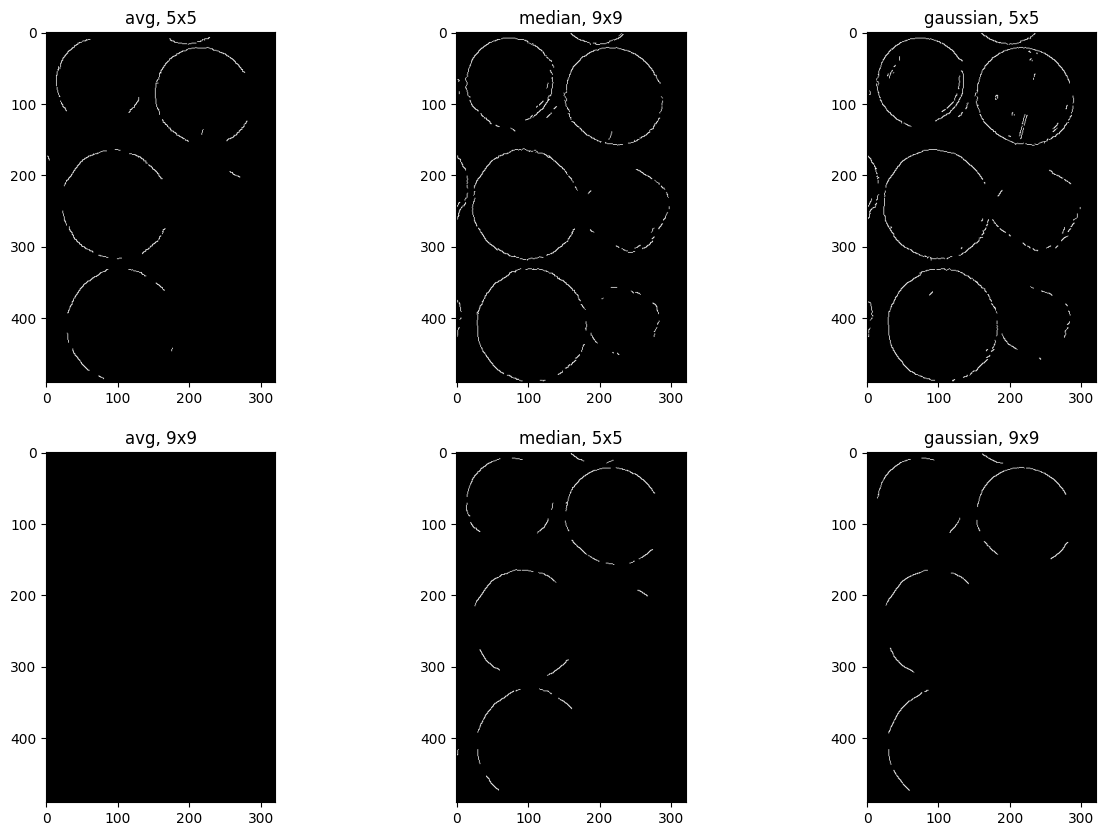

In [21]:
t1 = 200
t2 = 250

# show different denoising methods for the image avg, median, gaussian with two different kernel sizes

# Load the image
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)

# Create subplots

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)

f.set_figwidth(15)
f.set_figheight(10)
# Apply different denoising methods
avg_denoised_1 = cv2.blur(coins_noise, (5, 5))
avg_denoised_2 = cv2.blur(coins_noise, (9, 9))
median_denoised_1 = cv2.medianBlur(coins_noise, 5)
median_denoised_2 = cv2.medianBlur(coins_noise, 9)
gaussian_denoised_1 = cv2.GaussianBlur(coins_noise, (5, 5), 0)
gaussian_denoised_2 = cv2.GaussianBlur(coins_noise, (9, 9), 0)


# Apply Canny filter with t1 and t2 parameters
edges_avg_1 = cv2.Canny(avg_denoised_1, t1, t2)
edges_avg_2 = cv2.Canny(avg_denoised_2, t1, t2)
edges_median_1 = cv2.Canny(median_denoised_1, t1, t2)
edges_median_2 = cv2.Canny(median_denoised_2, t1, t2)
edges_gaussian_1 = cv2.Canny(gaussian_denoised_1, t1, t2)
edges_gaussian_2 = cv2.Canny(gaussian_denoised_2, t1, t2)

# Display the results

axes = [a1, a2, a3, a4, a5, a6]
images = [
    edges_avg_1,
    edges_median_1,
    edges_gaussian_1,
    edges_avg_2,
    edges_median_2,
    edges_gaussian_2,
]
titles = [
    "avg, 5x5",
    "median, 9x9",
    "gaussian, 5x5",
    "avg, 9x9",
    "median, 5x5",
    "gaussian, 9x9",
]

for ax, image, title in zip(axes, images, titles):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)

plt.show()



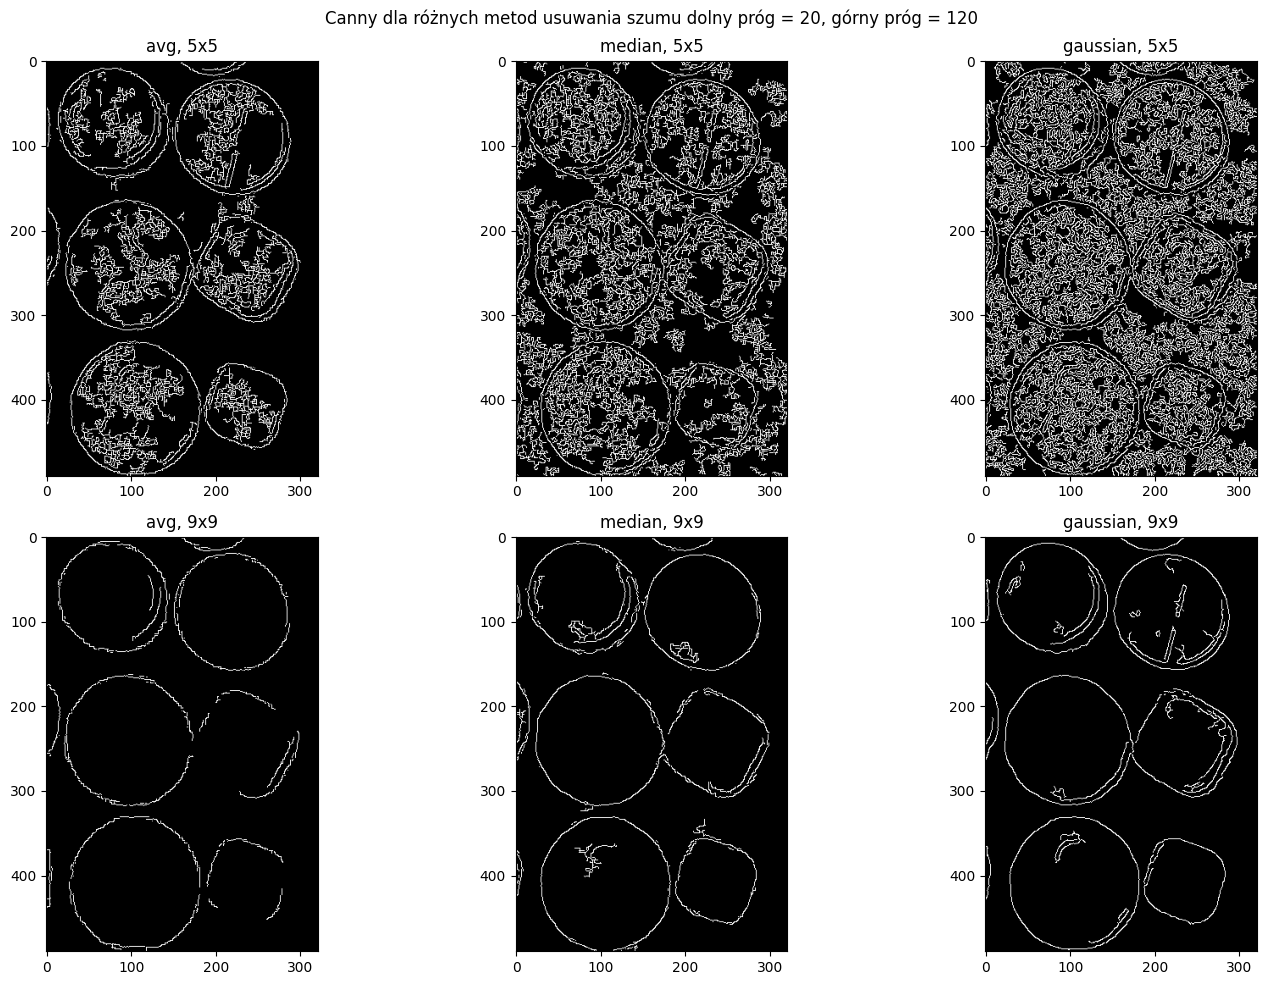

In [38]:
t1 = 20
t2 = 120

# Load the image
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)

# Create subplots

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.suptitle(f"Canny dla różnych metod usuwania szumu dolny próg = {t1}, górny próg = {t2}")

f.set_figwidth(15)
f.set_figheight(10)
# Apply different denoising methods
avg_denoised_1 = cv2.blur(coins_noise, (5, 5))
avg_denoised_2 = cv2.blur(coins_noise, (9, 9))
median_denoised_1 = cv2.medianBlur(coins_noise, 5)
median_denoised_2 = cv2.medianBlur(coins_noise, 9)
gaussian_denoised_1 = cv2.GaussianBlur(coins_noise, (5, 5), 0)
gaussian_denoised_2 = cv2.GaussianBlur(coins_noise, (9, 9), 0)


# Apply Canny filter with t1 and t2 parameters
edges_avg_1 = cv2.Canny(avg_denoised_1, t1, t2)
edges_avg_2 = cv2.Canny(avg_denoised_2, t1, t2)
edges_median_1 = cv2.Canny(median_denoised_1, t1, t2)
edges_median_2 = cv2.Canny(median_denoised_2, t1, t2)
edges_gaussian_1 = cv2.Canny(gaussian_denoised_1, t1, t2)
edges_gaussian_2 = cv2.Canny(gaussian_denoised_2, t1, t2)

# Display the results

axes = [a1, a2, a3, a4, a5, a6]
images = [
    edges_avg_1,
    edges_median_1,
    edges_gaussian_1,
    edges_avg_2,
    edges_median_2,
    edges_gaussian_2,
]
titles = [
    "avg, 5x5",
    "median, 5x5",
    "gaussian, 5x5",
    "avg, 9x9",
    "median, 9x9",
    "gaussian, 9x9",
]

for ax, image, title in zip(axes, images, titles):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)

f.tight_layout()
plt.show()

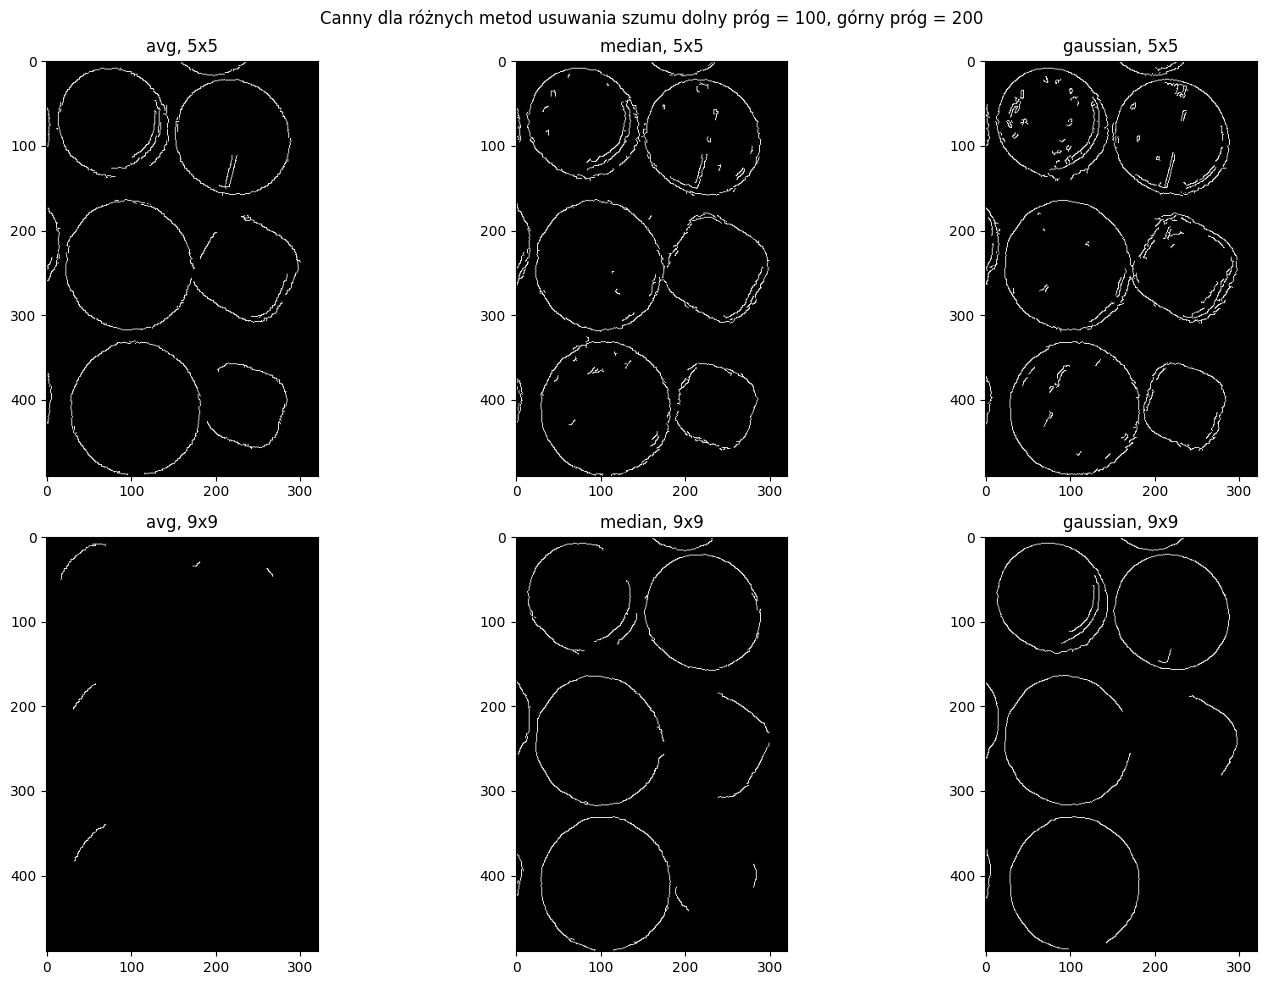

In [43]:
t1 = 100
t2 = 200

# Load the image
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)

# Create subplots

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.suptitle(
    f"Canny dla różnych metod usuwania szumu dolny próg = {t1}, górny próg = {t2}"
)

f.set_figwidth(15)
f.set_figheight(10)
# Apply different denoising methods
avg_denoised_1 = cv2.blur(coins_noise, (5, 5))
avg_denoised_2 = cv2.blur(coins_noise, (9, 9))
median_denoised_1 = cv2.medianBlur(coins_noise, 5)
median_denoised_2 = cv2.medianBlur(coins_noise, 9)
gaussian_denoised_1 = cv2.GaussianBlur(coins_noise, (5, 5), 0)
gaussian_denoised_2 = cv2.GaussianBlur(coins_noise, (9, 9), 0)


# Apply Canny filter with t1 and t2 parameters
edges_avg_1 = cv2.Canny(avg_denoised_1, t1, t2)
edges_avg_2 = cv2.Canny(avg_denoised_2, t1, t2)
edges_median_1 = cv2.Canny(median_denoised_1, t1, t2)
edges_median_2 = cv2.Canny(median_denoised_2, t1, t2)
edges_gaussian_1 = cv2.Canny(gaussian_denoised_1, t1, t2)
edges_gaussian_2 = cv2.Canny(gaussian_denoised_2, t1, t2)

# Display the results

axes = [a1, a2, a3, a4, a5, a6]
images = [
    edges_avg_1,
    edges_median_1,
    edges_gaussian_1,
    edges_avg_2,
    edges_median_2,
    edges_gaussian_2,
]
titles = [
    "avg, 5x5",
    "median, 5x5",
    "gaussian, 5x5",
    "avg, 9x9",
    "median, 9x9",
    "gaussian, 9x9",
]

for ax, image, title in zip(axes, images, titles):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)

f.tight_layout()
plt.show()

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

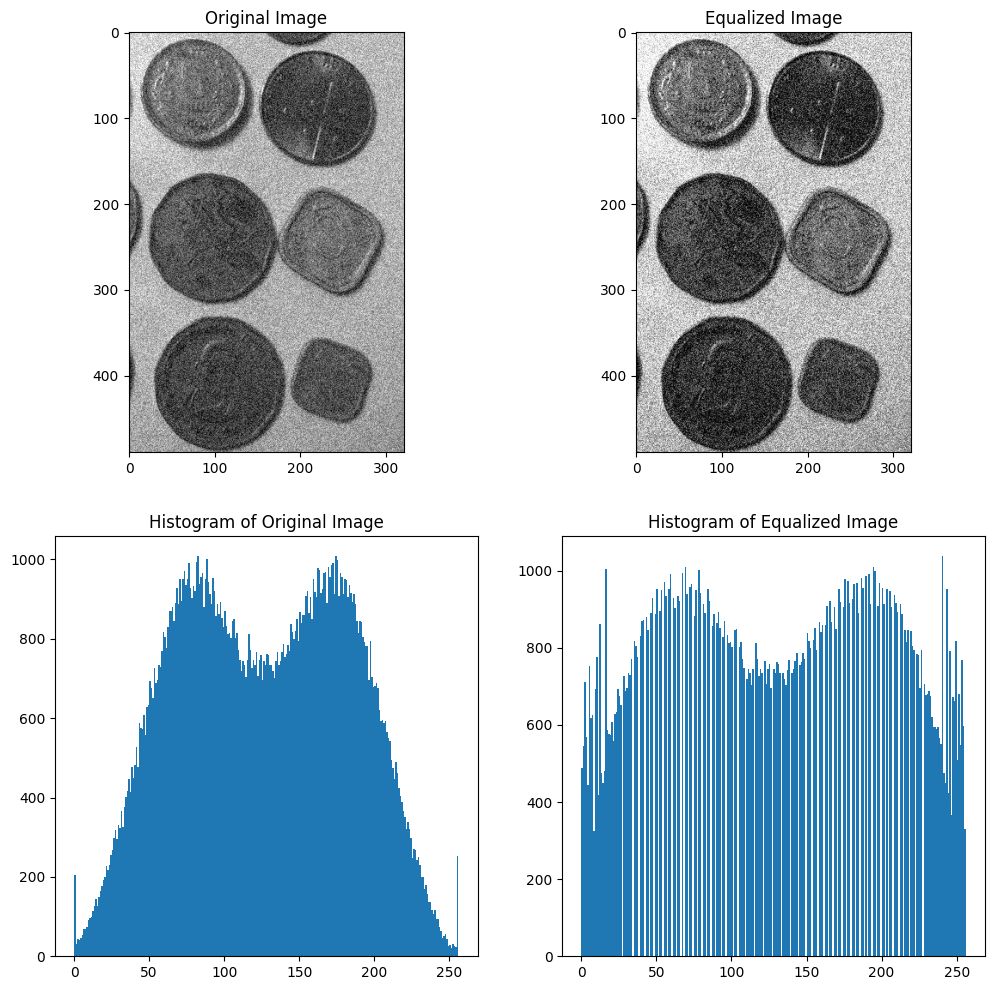

In [49]:
# Perform histogram equalization
equalized_image = cv2.equalizeHist(coins_noise)

# Display the original and equalized images
f, axarr = plt.subplots(2, 2, figsize=(12, 12))

axarr[0, 0].imshow(coins_noise, cmap='gray')
axarr[0, 0].set_title('Original Image')

axarr[0, 1].imshow(equalized_image, cmap='gray')
axarr[0, 1].set_title('Equalized Image')

# Plot histograms
axarr[1, 0].hist(coins_noise.ravel(), bins=256, range=[0, 256])
axarr[1, 0].set_title('Histogram of Original Image')

axarr[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 256])
axarr[1, 1].set_title('Histogram of Equalized Image')

plt.show()


Dość ciemne barwy stały się bardzo ciemne, dość białe stały się bardzo białe graliśmy Histogram widząc że rozszerzenie histogramu tylko dotyczy pewnych intensywności szarego. Trzeba zwrócić uwagę na brakujące wartości w Instagramie które po prostu nie istnieją.

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

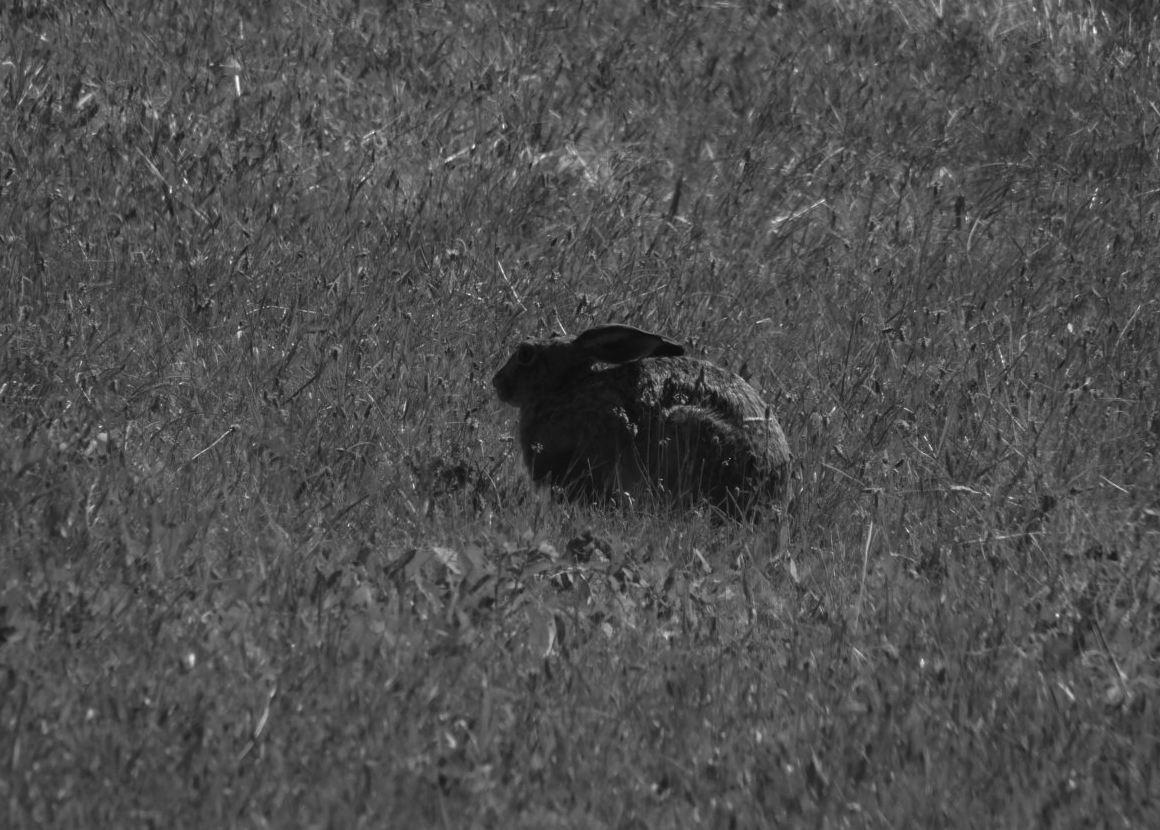

In [14]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

In [160]:
def bimodal_gaussian_lut(size=256, mean1=20, mean2=180, sigma1=8, sigma2=8):
    x = np.arange(size)
    gauss1 = np.exp(-((x - mean1) ** 2) / (2 * sigma1**2))
    gauss2 = np.exp(-((x - mean2) ** 2) / (2 * sigma2**2))
    lut = (gauss1 + gauss2) * 255 / (gauss1 + gauss2).max() # normalizacja do [0, 255]
    return lut.astype(np.uint8)

## Nieporpawne rozwiązanie

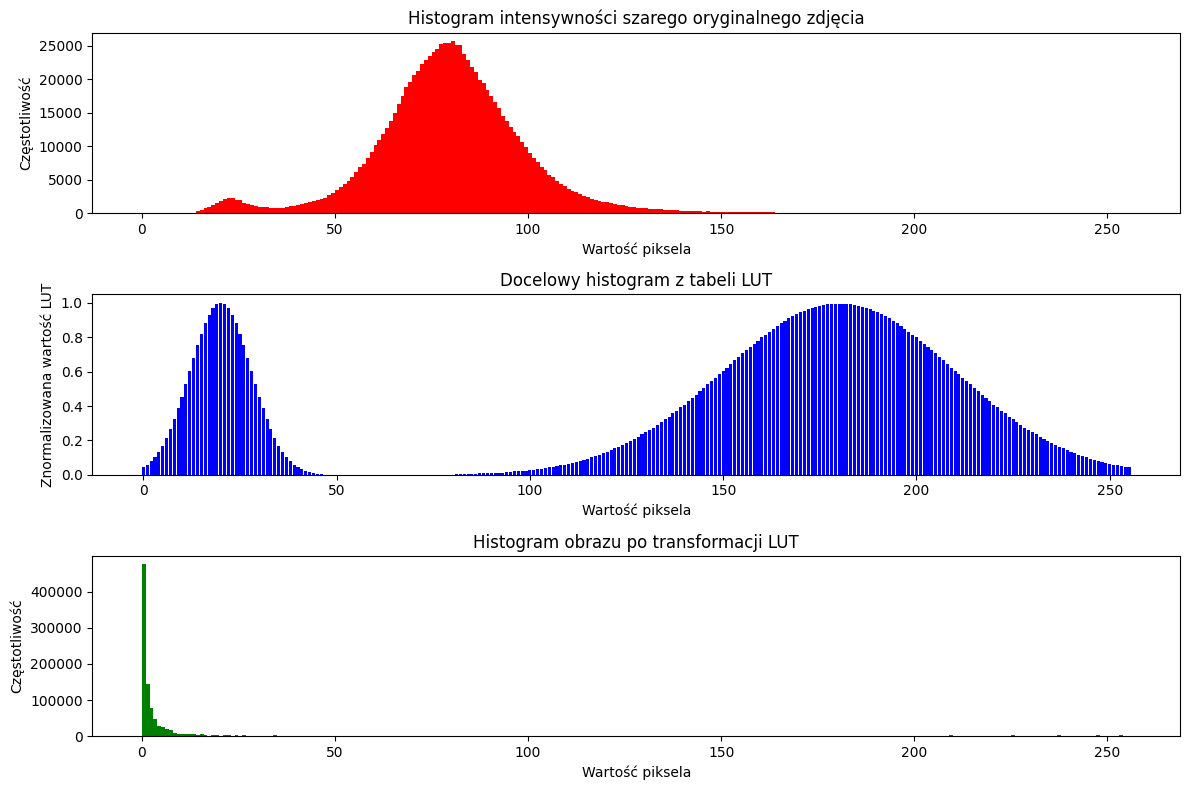

In [161]:
lut = bimodal_gaussian_lut(size=256, mean1=20, mean2=180, sigma1=8, sigma2=30)
transformed_image = cv2.LUT(hare_gray, lut)

plt.figure(figsize=(12, 8))

# 1. Histogram oryginalnego obrazu
plt.subplot(3, 1, 1)
plt.hist(hare_gray.ravel(), bins=256, range=[0, 256], color='red')
plt.title('Histogram intensywności szarego oryginalnego zdjęcia')
plt.xlabel('Wartość piksela')
plt.ylabel('Częstotliwość')

# 2. Wykres LUT (docelowy histogram)
plt.subplot(3, 1, 2)
plt.bar(range(len(lut)), lut / 255.0, color="blue")  # Normalizacja LUT do zakresu 0-1
plt.title('Docelowy histogram z tabeli LUT')
plt.xlabel('Wartość piksela')
plt.ylabel('Znormalizowana wartość LUT')

# 3. Histogram obrazu po transformacji
plt.subplot(3, 1, 3)
plt.hist(transformed_image.ravel(), bins=256, range=[0, 256], color='green')
plt.title('Histogram obrazu po transformacji LUT')
plt.xlabel('Wartość piksela')
plt.ylabel('Częstotliwość')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

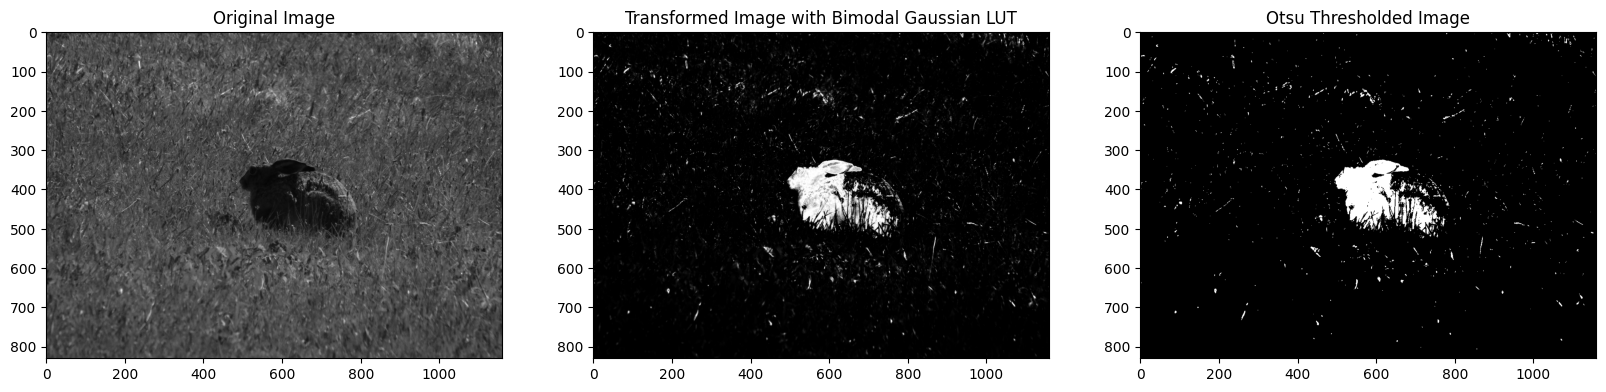

White pixels: 29919
Black pixels: 932881


In [150]:
_, otsu_thresholded = cv2.threshold(transformed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Display the original and transformed images
f, axarr = plt.subplots(1, 3, figsize=(20, 40))

axarr[0].imshow(hare_gray, cmap="gray")
axarr[0].set_title('Original Image')

axarr[1].imshow(transformed_image, cmap='gray')
axarr[1].set_title('Transformed Image with Bimodal Gaussian LUT')

axarr[2].imshow(otsu_thresholded, cmap='gray')
axarr[2].set_title('Otsu Thresholded Image')

plt.show()

# print how many pixels are white and black
white_pixels = np.sum(otsu_thresholded == 255)
black_pixels = np.sum(otsu_thresholded == 0)

print(f'White pixels: {white_pixels}')
print(f'Black pixels: {black_pixels}')

## Poprawne rozwiązanie

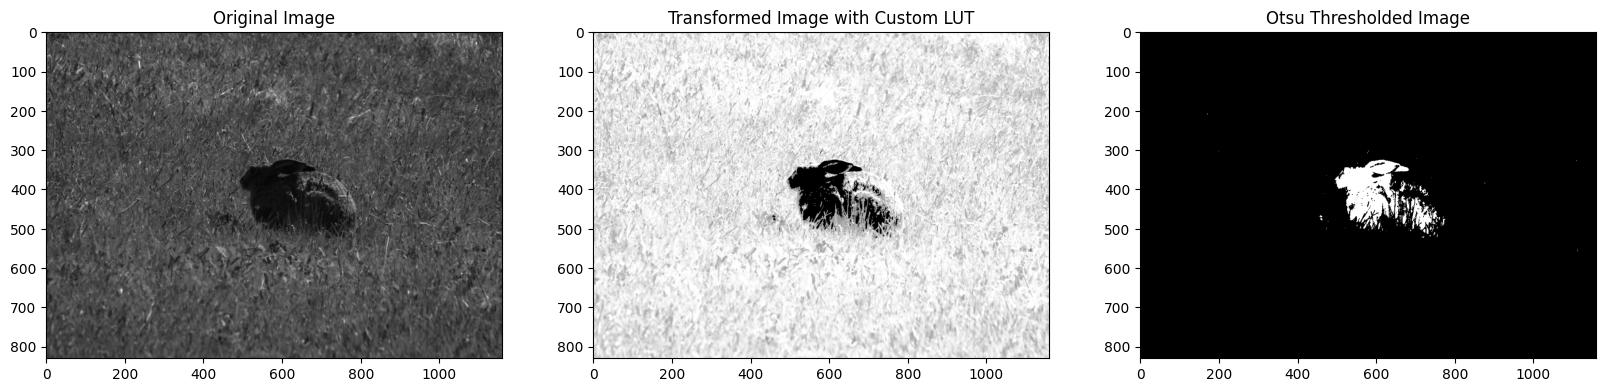

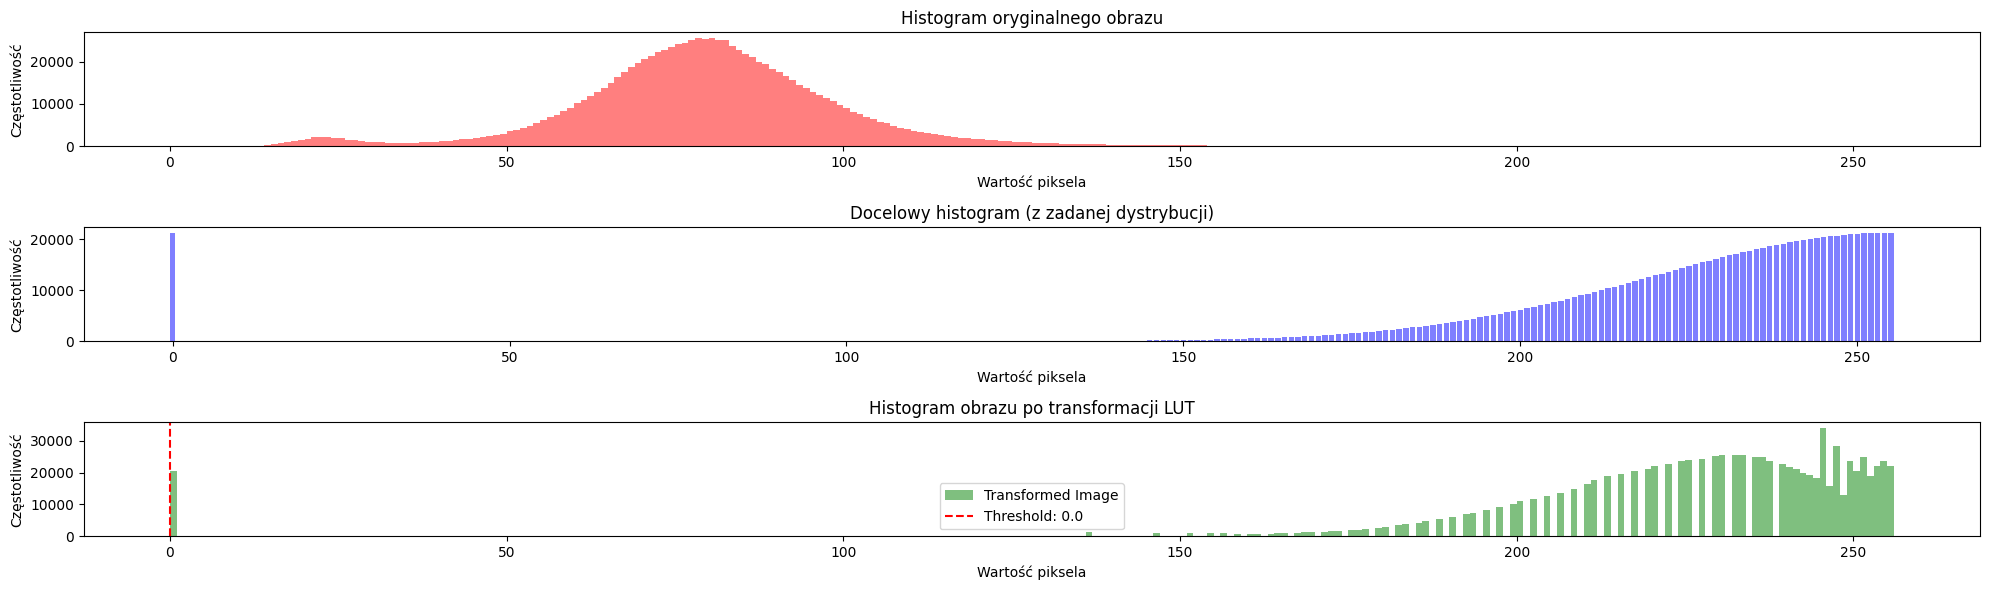

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Funkcja generująca LUT na podstawie zadanej CDF (dla docelowego histogramu)
def generate_lut_for_histogram_matching(src_cdf, target_cdf):
    lut = np.zeros(256, dtype=np.uint8)
    g_j = 0
    for g_i in range(256):
        while g_j < 255 and target_cdf[g_j] < src_cdf[g_i]:
            g_j += 1
        lut[g_i] = g_j
    return lut


# Funkcja dopasowująca histogram obrazu do zadanego histogramu docelowego
def match_histogram_to_target(image, target_histogram):
    # 1. Obliczanie histogramu oryginalnego obrazu
    src_hist, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    src_cdf = np.cumsum(src_hist).astype(np.float64)
    src_cdf = src_cdf / src_cdf[-1]  # Normalizacja CDF do [0, 1]

    # 2. Obliczanie CDF dla docelowego histogramu
    target_cdf = np.cumsum(target_histogram).astype(np.float64)
    target_cdf = target_cdf / target_cdf[-1]  # Normalizacja CDF do [0, 1]

    # 3. Generowanie LUT
    lut = generate_lut_for_histogram_matching(src_cdf, target_cdf)

    # 4. Przekształcanie obrazu przy użyciu LUT
    transformed_image = cv2.LUT(image, lut)

    return transformed_image, lut


# Funkcja generująca docelowy histogram z wybranego rozkładu
def target_histogram_from_distribution(
    size=256, distribution_type="gaussian", **kwargs
):
    x = np.arange(size)

    # Generowanie rozkładu na podstawie typu
    if distribution_type == "gaussian":
        mean = kwargs.get("mean", size // 2)
        sigma = kwargs.get("sigma", 10)
        distribution = np.exp(-((x - mean) ** 2) / (2 * sigma**2))

    elif distribution_type == "bimodal":
        mean1 = kwargs.get("mean1", size // 4)
        mean2 = kwargs.get("mean2", 3 * size // 4)
        sigma1 = kwargs.get("sigma1", 10)
        sigma2 = kwargs.get("sigma2", 10)
        gauss1 = np.exp(-((x - mean1) ** 2) / (2 * sigma1**2))
        gauss2 = np.exp(-((x - mean2) ** 2) / (2 * sigma2**2))
        distribution = gauss1 + gauss2

    elif distribution_type == "uniform":
        low = kwargs.get("low", 0)
        high = kwargs.get("high", size)
        distribution = np.ones(size)
        distribution[:low] = 0
        distribution[high:] = 0

    else:
        raise ValueError(f"Unknown distribution type: {distribution_type}")

    # Normalizacja rozkładu, aby uzyskać prawdopodobieństwo
    target_histogram = distribution / distribution.sum()

    return target_histogram



# Krok 1: Generowanie docelowego histogramu
target_hist = target_histogram_from_distribution(
    size=256, distribution_type="bimodal", mean1=0, mean2=255, sigma1=0.1, sigma2=35
)


# Krok 2: Dopasowanie histogramu obrazu do zadanego histogramu docelowego
transformed_image, lut = match_histogram_to_target(hare_gray, target_hist)

#otsu
T, otsu_thresholded = cv2.threshold(transformed_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Wyświetlenie oryginalnego i przekształconego obrazu
f, axarr = plt.subplots(1, 3, figsize=(20, 6))

axarr[0].imshow(hare_gray, cmap="gray")
axarr[0].set_title("Original Image")

axarr[1].imshow(transformed_image, cmap="gray")
axarr[1].set_title("Transformed Image with Custom LUT")

axarr[2].imshow(otsu_thresholded, cmap="gray")
axarr[2].set_title("Otsu Thresholded Image")

plt.show()

# Wyświetlenie histogramów
plt.figure(figsize=(20, 6))

# Histogram oryginalnego obrazu
plt.subplot(3, 1, 1)
plt.hist(
    hare_gray.ravel(),
    bins=256,
    range=[0, 256],
    color="red",
    alpha=0.5,
    label="Original Image",
)
plt.title("Histogram oryginalnego obrazu")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")

# Histogram docelowy (z zadanej dystrybucji)
plt.subplot(3, 1, 2)
plt.bar(
    range(256),
    target_hist * hare_gray.size,
    color="blue",
    alpha=0.5,
    label="Target Histogram",
)
plt.title("Docelowy histogram (z zadanej dystrybucji)")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")

# Histogram przekształconego obrazu
plt.subplot(3, 1, 3)
plt.hist(
    transformed_image.ravel(),
    bins=256,
    range=[0, 256],
    color="green",
    alpha=0.5,
    label="Transformed Image",
)
plt.axvline(x=T, color='red', linestyle='--', label=f'Threshold: {T}')
plt.title("Histogram obrazu po transformacji LUT")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")
plt.legend()

plt.tight_layout()
plt.show()

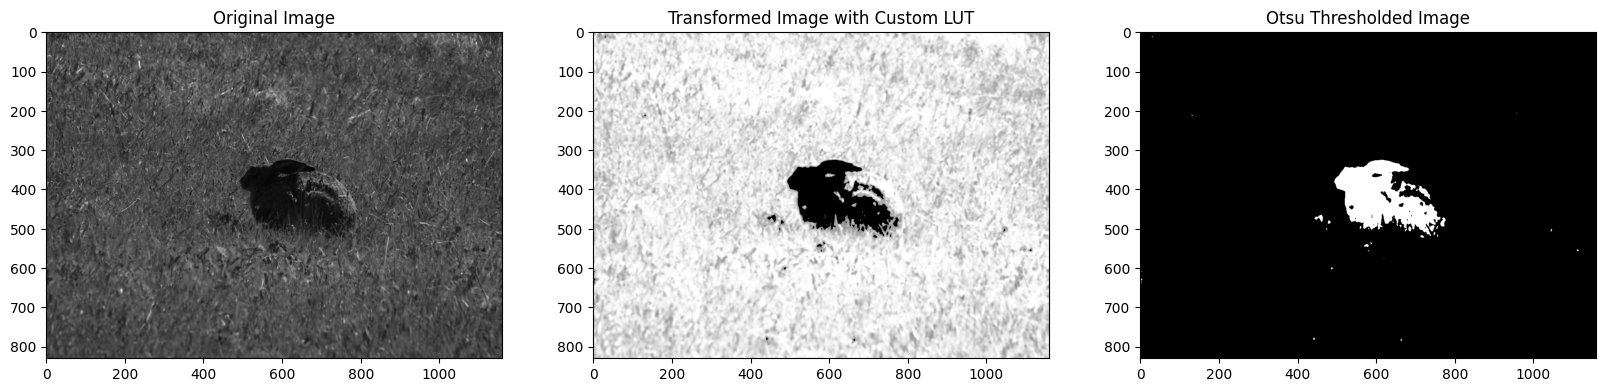

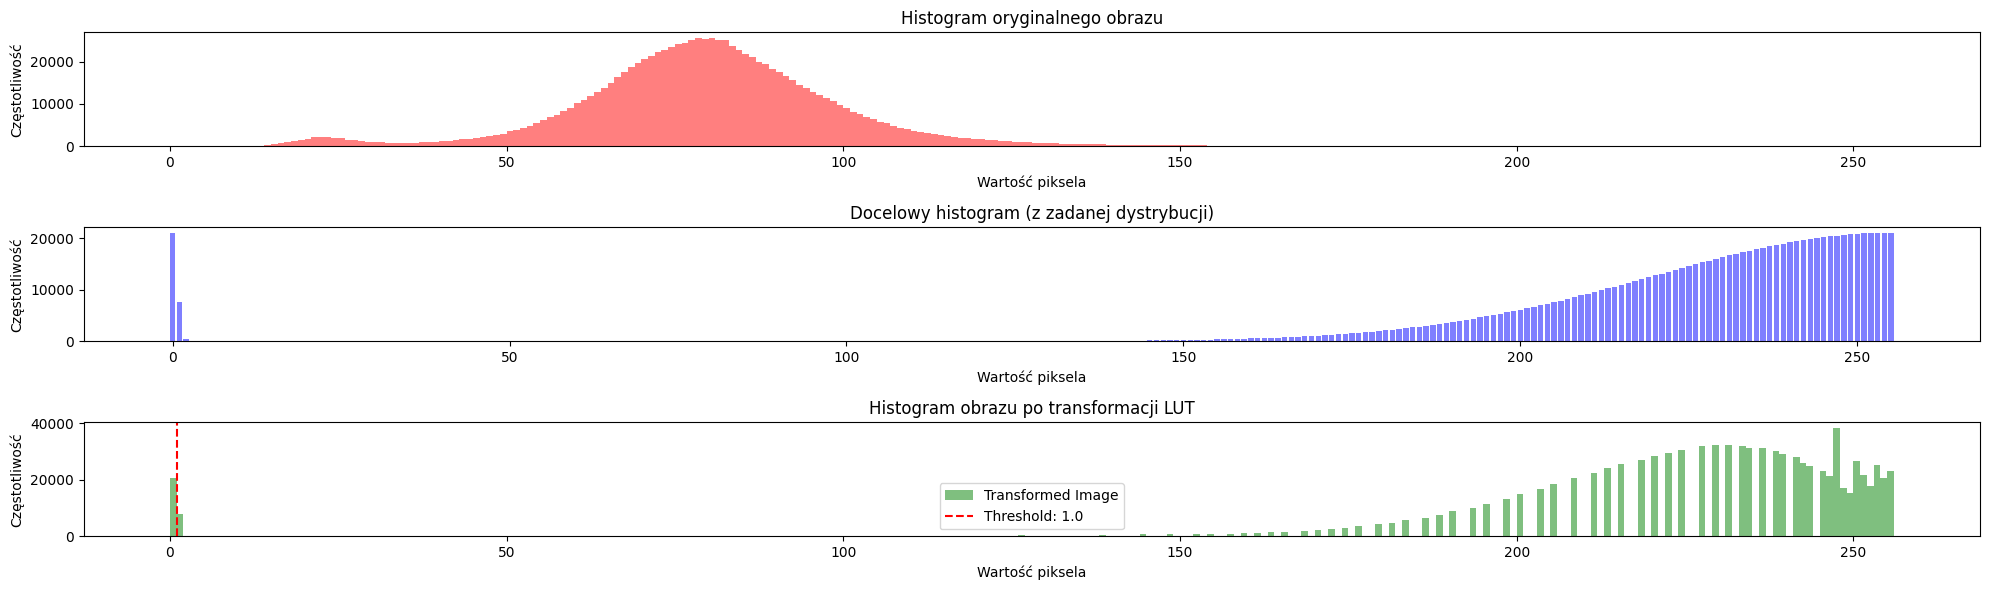

In [21]:
hare_gray_blur = cv2.GaussianBlur(hare_gray, (9, 9), 0)

target_hist = target_histogram_from_distribution(
    size=256, distribution_type="bimodal", mean1=0, mean2=255, sigma1=0.7, sigma2=35
)


# Krok 2: Dopasowanie histogramu obrazu do zadanego histogramu docelowego
transformed_image, lut = match_histogram_to_target(hare_gray_blur, target_hist)

# otsu
T, otsu_thresholded = cv2.threshold(
    transformed_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

# Wyświetlenie oryginalnego i przekształconego obrazu
f, axarr = plt.subplots(1, 3, figsize=(20, 6))

axarr[0].imshow(hare_gray, cmap="gray")
axarr[0].set_title("Original Image")

axarr[1].imshow(transformed_image, cmap="gray")
axarr[1].set_title("Transformed Image with Custom LUT")

axarr[2].imshow(otsu_thresholded, cmap="gray")
axarr[2].set_title("Otsu Thresholded Image")

plt.show()

# Wyświetlenie histogramów
plt.figure(figsize=(20, 6))

# Histogram oryginalnego obrazu
plt.subplot(3, 1, 1)
plt.hist(
    hare_gray.ravel(),
    bins=256,
    range=[0, 256],
    color="red",
    alpha=0.5,
    label="Original Image",
)
plt.title("Histogram oryginalnego obrazu")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")

# Histogram docelowy (z zadanej dystrybucji)
plt.subplot(3, 1, 2)
plt.bar(
    range(256),
    target_hist * hare_gray.size,
    color="blue",
    alpha=0.5,
    label="Target Histogram",
)
plt.title("Docelowy histogram (z zadanej dystrybucji)")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")

# Histogram przekształconego obrazu
plt.subplot(3, 1, 3)
plt.hist(
    transformed_image.ravel(),
    bins=256,
    range=[0, 256],
    color="green",
    alpha=0.5,
    label="Transformed Image",
)
plt.axvline(x=T, color="red", linestyle="--", label=f"Threshold: {T}")
plt.title("Histogram obrazu po transformacji LUT")
plt.xlabel("Wartość piksela")
plt.ylabel("Częstotliwość")
plt.legend()

plt.tight_layout()
plt.show()